In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import pandas as pd
import seaborn as sns
import pickle

from aalpy.learning_algs import run_Alergia
from aalpy.utils import save_automaton_to_file
from IPython.display import Image
from aalpy.automata import MarkovChain
from pathlib import Path

from journepy.src.mc_utils import uppaal_utils

import networkx as nx
import multiprocessing

import subprocess
import matplotlib.patches as mpatches


In [3]:
VERIFYTA_PATH = "/home/paul/Downloads/uppaal-5.0.0-linux64/bin/verifyta"
N_PROCESSES = 6

In [4]:
df_tracks = pd.read_csv("data/track_features/tf_mini.csv")

# Visualize users in histograms

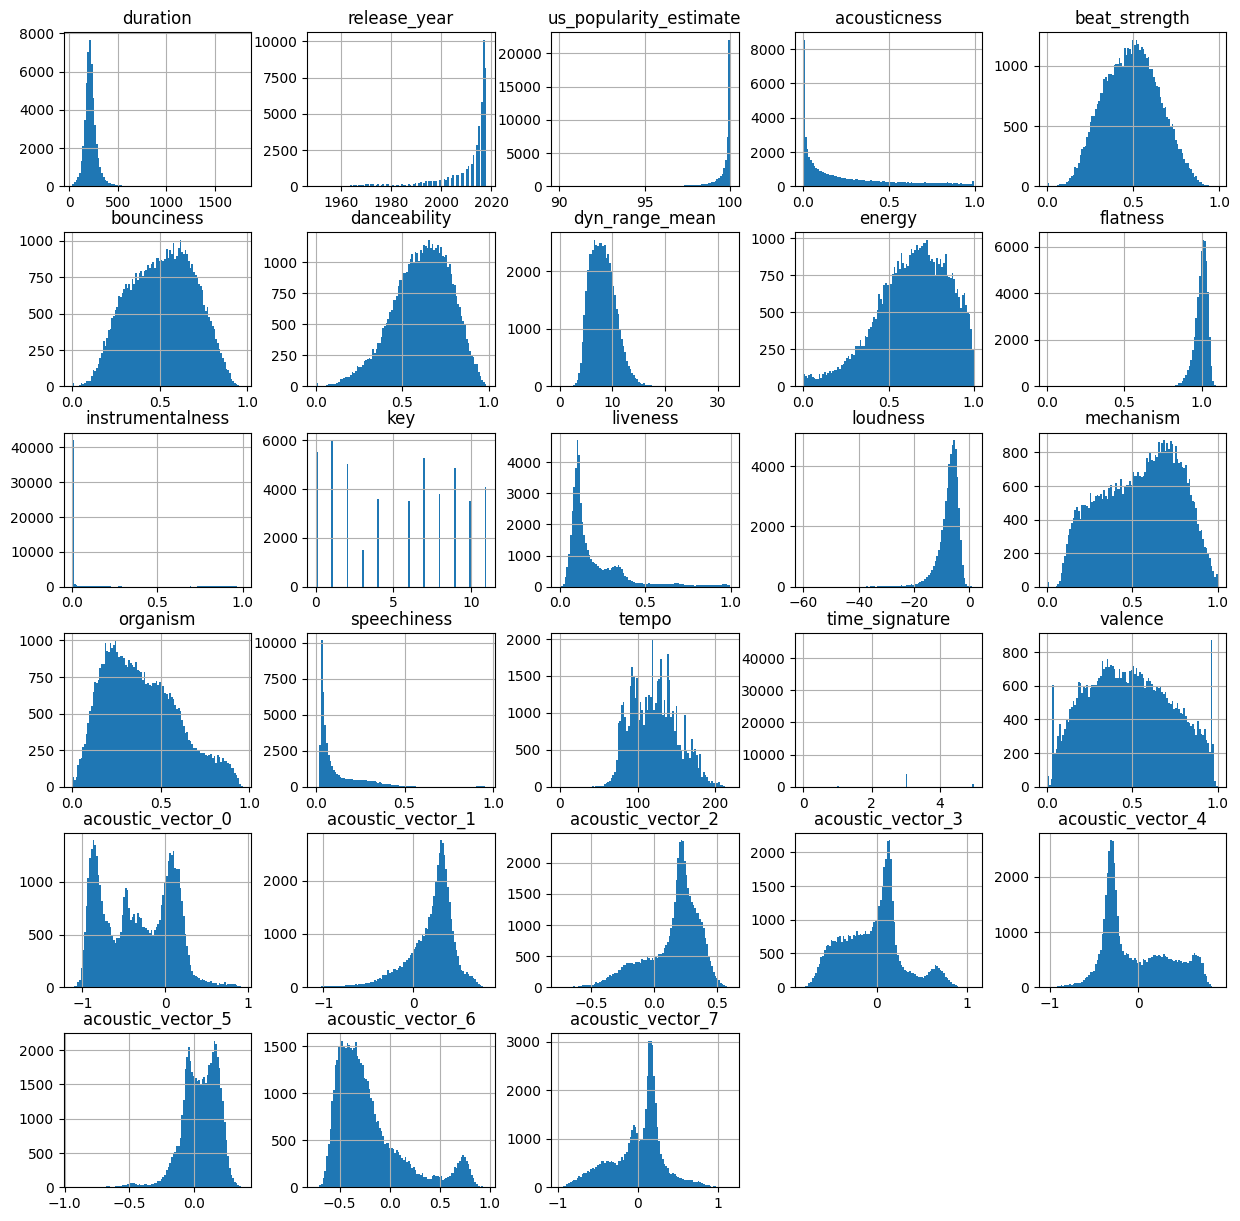

In [5]:
# averages over all features
hist_array = df_tracks.hist(bins=100, figsize= (15,15))
for i in range(len(hist_array)):
    for j in range(len(hist_array[0])):
        title = hist_array[i][j].get_title()

plt.show()

## Selected Features for Professor and Student

In [6]:
professor_avg = {'acousticness' : 0.5, 'danceability' : 0.6, 'energy': 0.4}
student_avg = {'acousticness' : 0.0, 'danceability' : 0.3, 'energy': 0.9}

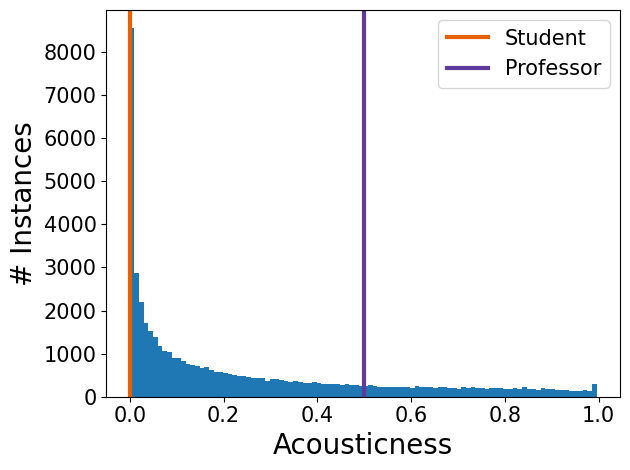

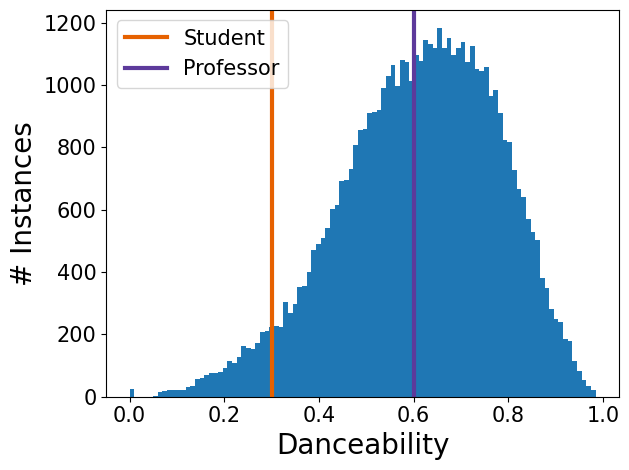

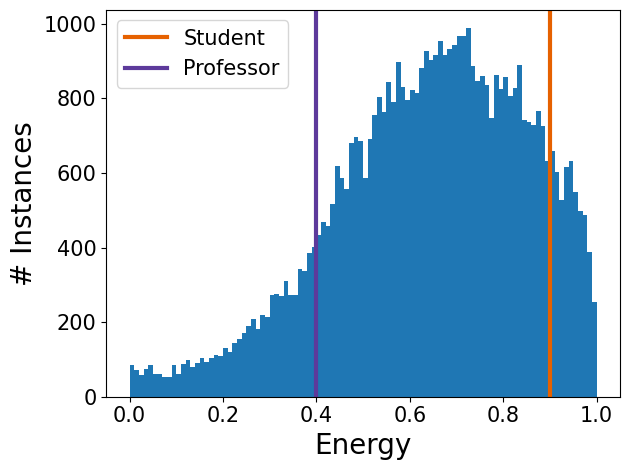

In [7]:
keys = ['acousticness', 'danceability', 'energy']
for k in keys:
    plt.hist(df_tracks[k], bins = 100)
    if k in student_avg:
            plt.axvline(student_avg[k], c = '#E66100', label="Student", linewidth= 3)
    if k in professor_avg:
            plt.axvline(professor_avg[k], c = "#5D3A9B", label ="Professor", linewidth= 3)
    #plt.title(k)
    plt.xlabel(k.title(), fontsize = 20)
    plt.ylabel("# Instances", fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.savefig("out/"+k+".png", dpi = 200)
    plt.show()


# Investigate MSSD Dataset

In [8]:
df = pd.read_csv("data/training_set/log_mini.csv")
df['no_pause_before_play'] = df['no_pause_before_play'].astype('bool')
df['long_pause_before_play'] = df['long_pause_before_play'].astype('bool')
df['short_pause_before_play'] = df['short_pause_before_play'].astype('bool')
df

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,False,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,True,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,True,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,True,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,True,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,True,...,False,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,True,...,False,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,True,...,False,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,True,...,False,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


50704
1 50704
2 18881
3 10777
4 7231
5 5397
6 4319
7 3541
8 2983
9 2564
10 2233
11 1957
12 1768
13 1594
14 1445
15 1334
16 1228
17 1129
18 1051
19 978
20 920
21 874
22 831
23 786
24 754
25 718
26 697
27 661
28 635
29 612


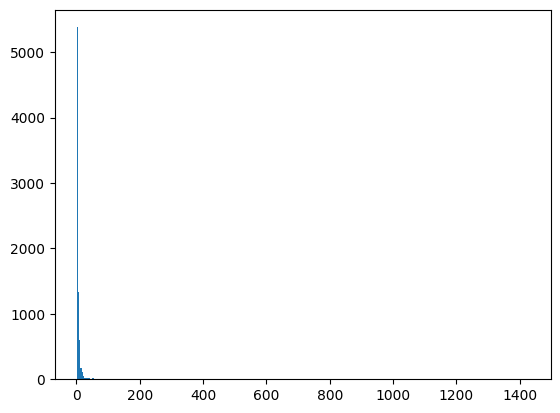

In [9]:
from collections import Counter
print(len(set(df['track_id_clean']))) # records 50k songs from 167k plays
c = Counter(df['track_id_clean'])
plt.hist([x for x in c.values() if x > 2], bins = 1000)
for i in range(1,30):
    print(i, len([x for x in c.values() if x >= i])) # 31k songs only played once

# observe steep decline in amounts that songs were played

## Investigate Feature Values

In [10]:
print('### End and Start Values ###')
print(set(df['hist_user_behavior_reason_end']))
print(set(df['hist_user_behavior_reason_start']))

print('### Session Lengths ###')
print("maximum length")
print(max(df['session_length']))
print("min length")
print(min(df['session_length']))


print('### Forward / backwards ###')
print("max seekback", max(df['hist_user_behavior_n_seekback']))
print("max seekfwd", max(df['hist_user_behavior_n_seekfwd']))

print('### Context Types ###')
print(set(df['context_type']))

### End and Start Values ###
{'backbtn', 'logout', 'endplay', 'clickrow', 'remote', 'trackdone', 'fwdbtn'}
{'backbtn', 'appload', 'clickrow', 'playbtn', 'endplay', 'remote', 'trackdone', 'fwdbtn', 'trackerror'}
### Session Lengths ###
maximum length
20
min length
10
### Forward / backwards ###
max seekback 151
max seekfwd 60
### Context Types ###
{'user_collection', 'personalized_playlist', 'editorial_playlist', 'catalog', 'charts', 'radio'}


In [11]:
# not really much relation between "only very brief", "only brief" and "most of track" (skip_1, skip2, and skip_3)
df['concat'] = [' '.join([str(s1), str(s2), str(s3), str(s4)]) for s1, s2, s3, s4 in zip(df['skip_1'], df['skip_2'], df['skip_3'], df['not_skipped'])]

"""
strings = set()
for i in range(df.shape[0]):
    added = str(df.iloc[i]['skip_1']) + " " + str(line['skip_2']) + " " + str(df.iloc[i]['skip_3']) + " " + str(df.iloc[i]['not_skipped'])
    strings.update([added])
strings
"""
set(df['concat'].values)

{'False False False False',
 'False False False True',
 'False False True False',
 'False True False False',
 'False True True False',
 'True True True False'}

In [12]:
# years played in contained journeys
merged = df.merge(df_tracks, left_on='track_id_clean', right_on='track_id')

# enrich with other information
df = merged

(array([1.41908086e-04, 7.88378253e-05, 2.41769331e-04, 2.99583736e-04,
        2.36513476e-04, 3.41630576e-04, 1.15891603e-03, 1.57150065e-03,
        1.66347811e-03, 1.63982677e-03, 1.81064206e-03, 2.45974015e-03,
        1.85006097e-03, 9.17146701e-04, 9.72333179e-04, 1.34812681e-03,
        1.04591515e-03, 1.54259345e-03, 3.99970567e-03, 3.29279317e-03,
        3.32695623e-03, 3.67647059e-03, 6.39111971e-03, 5.17438927e-03,
        7.22942858e-03, 7.24519615e-03, 1.65795947e-02, 1.89131943e-02,
        4.21151663e-02, 3.03911933e-01]),
 array([1950.        , 1952.26666667, 1954.53333333, 1956.8       ,
        1959.06666667, 1961.33333333, 1963.6       , 1965.86666667,
        1968.13333333, 1970.4       , 1972.66666667, 1974.93333333,
        1977.2       , 1979.46666667, 1981.73333333, 1984.        ,
        1986.26666667, 1988.53333333, 1990.8       , 1993.06666667,
        1995.33333333, 1997.6       , 1999.86666667, 2002.13333333,
        2004.4       , 2006.66666667, 2008.933

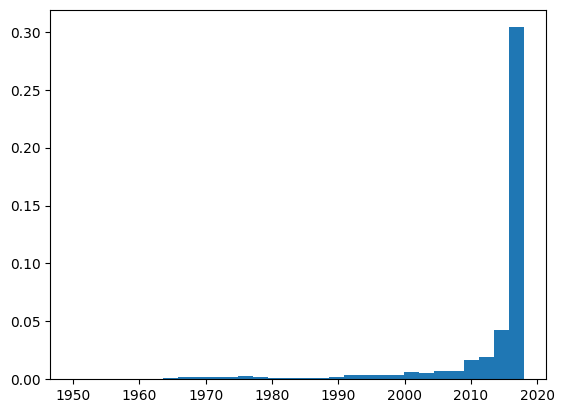

In [13]:
# release years
Counter(df['release_year']).most_common()
plt.hist(df['release_year'], density=True, bins = 30)

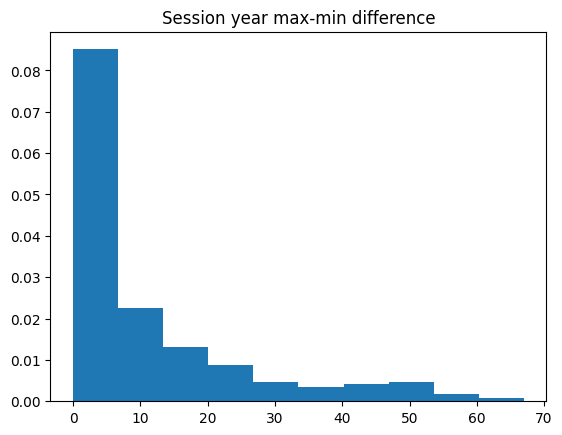

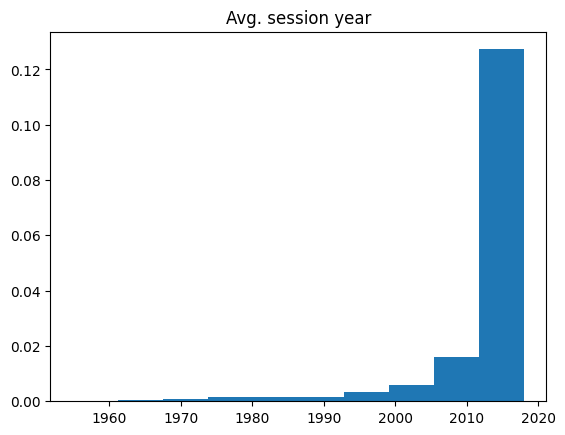

In [14]:
df['session_min'] = df.groupby('session_id')['release_year'].transform('min')
df['session_max'] = df.groupby('session_id')['release_year'].transform('max')
df['session_avg'] = df.groupby('session_id')['release_year'].transform('mean')
plt.hist(df['session_max']-df['session_min'], density=True)
plt.title("Session year max-min difference")
plt.show()
plt.hist(df['session_avg'], density=True)
plt.title("Avg. session year")
plt.show()

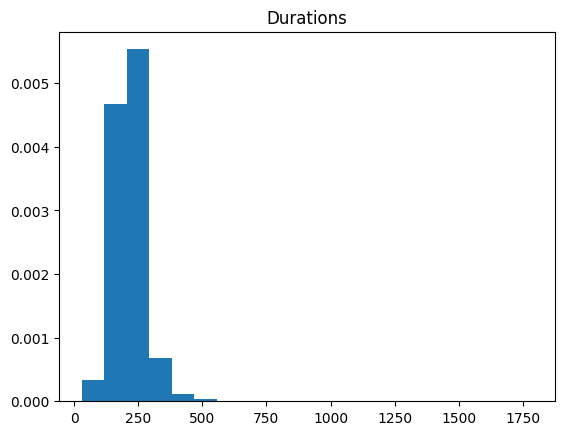

In [15]:
plt.hist(df['duration'], density=True, bins = 20)
plt.title('Durations')
plt.show()

In [16]:
# Assert implications:
# not_skipped -> not (skip_1 or skip_2 or skip_3)
# skip_i -> not not_skipped
for i in range(df.shape[0]):
    line = df.iloc[i]
    if line['not_skipped']:
        # if not skipped, all skip_i are false
        assert(not (line['skip_1'] or line['skip_2'] or line['skip_3']))
    else:
        if line['skip_3']:
            #print(line)
            #assert(not line['skip_2'] and not line['skip_1'])
            assert(not line['not_skipped'])
        if line['skip_2']:
            #assert(not line['skip_1'])
            assert(not line['not_skipped'])
        if line['skip_1']:
            assert(not line['not_skipped'])

    if line['no_pause_before_play']:
        assert(not line['short_pause_before_play'] and not line['long_pause_before_play'])
    if not line['no_pause_before_play']:
        if line['session_position']!= 1:
            assert(line['short_pause_before_play'] or line['long_pause_before_play'])

In [17]:
def get_profile(session_df : pd.DataFrame, prefix : str, feature_names : list):
    avg_df = session_df.mean(numeric_only=True)
    features = []
    for feature_name in feature_names:
        features.append(str(int(10*avg_df[feature_name])))
    profile = "_".join(features)
    return [prefix+'profile_'+profile]

In [18]:
def build_journeys(df, feature_names : list, c : Counter, min_track_plays):
    log = []
    song_durations = {}
    grouped_df = df.groupby(by = ['session_id'])
    for session_id in set(df['session_id']):
        session_log = ['start_session']
        df_filtered = grouped_df.get_group(session_id)
        df_filtered = df_filtered.sort_values(['session_position'])
        df_filtered.reset_index(drop=True, inplace=True)
        df_dicts = df_filtered.to_dict(orient='index')
        # start profile
        session_log.extend(get_profile(df_filtered[df_filtered['session_position']<= 5], "start", feature_names))
        for pos in range(0, len(df_filtered['session_length'])):
            e = df_dicts[pos] # convert to single row structure
            assert(e['session_position'] == pos+1)
            # pauses
            if pos != 0: # if first pos, there was no break...
                if not e['no_pause_before_play']:
                    if e['long_pause_before_play']:
                        session_log.append("long_pause")
                    else:
                        assert(e['short_pause_before_play'])
                        session_log.append("short_pause")
            
            # always append context to determine if next song selection is controllable
            context = e['context_type']
            session_log.append('select_context_'+ context)
            
            decade = str(e['release_year']%100//10*10)
            duration = int(e['duration']//60)
            mode = str(e['mode'])
            features = []
            for feature_name in feature_names:
                features.append(str(int(10*e[feature_name])))
            prefix = 'played'
            if e['context_type'] in controllable_context:
                prefix = 'song'
            # state = "_".join([prefix, duration, decade, mode, acousticness, danceability, energy])
            
            state_features = [prefix, decade, mode]
            state_features.extend(features)
            state = "_".join(state_features)
            
            if state in song_durations:
                song_durations[state].add(duration)
            else:
                song_durations[state] = {duration}

            session_log.append(state)
            # skips - challenge targets for skip_2, decided to use
            if not e['skip_2']:
                session_log.append("skipped")
            else:
                session_log.append("not_skipped")

        # we ignore forwarding and backwarding
        # end profile
        # dont append end - only insert in contexts
        #session_log.append('end')
        log.append(session_log)
    return log, song_durations

controllable_context = ['radio', 'editorial_playlist', 'charts', 'personalized_playlist']
feature_names = ["acousticness", "danceability", "energy"]
log, song_durations = build_journeys(df, feature_names, c, 19)
# assume that the duration of a song is at least one time unit
song_durations = dict((k, (max(min(v), 1), max(v))) for k, v in song_durations.items())

In [19]:
# number of different abstract song classes 
len(song_durations) 

7013

In [20]:
# filter profiles
def filter_log_profiles(log, start_profile_pair, target_profile_pair, max_dist = 2):
    profiles = []
    assert(len(start_profile_pair) == len(feature_names))
    assert(len(target_profile_pair) == len(feature_names))
    filtered_log = []
    for t in log:
        assert 'profile_'  in t[1]
        profile = t[1].split('startprofile_')[1].split('_')
        profiles.append('_'.join(profile))
        assert len(start_profile_pair) == len(profile)
        if all([int(profile[i]) >= min(start_profile_pair[i], target_profile_pair[i]) - max_dist and 
                int(profile[i]) <= max(start_profile_pair[i], target_profile_pair[i]) + max_dist for i in range(len(profile))]):
            filtered_log.append(t)
    return filtered_log

start_profile = (5, 6, 4)
target_profile = (0, 3, 9)
filtered_log = filter_log_profiles(log, start_profile, target_profile, max_dist = 1)
print(len(filtered_log))

8600


# Learn Music-Streaming User Journey

In [21]:
# only uses 5 tracks for fast computation
model = run_Alergia(filtered_log[:5], automaton_type='mc', eps=0.9, print_info=True)

PTA Construction Time:  0.0
Alergia Learning Time: 0.04
Alergia Learned 71 state automaton.


In [22]:
filename = "out/mc09"
save_automaton_to_file(model, f"{filename}.dot")
#save_automaton_to_file(model, f"{filename}.png", file_type="png")

Model saved to out/mc09.dot.


# Write to UPPAAL

In [23]:
def mc_to_nx(model : MarkovChain):
    g = nx.DiGraph()
    for s in model.states:
        source = f"{s.state_id}: {s.output}"

        for transition in s.transitions:
            target = f"{transition[0].state_id}: {transition[0].output}"    
            g.add_edge(source, target, action=transition[0].output)
            controllable = False # actors[action] == "company" if action in actors else action == "company"
            if "song_" in target or "end" in target:
                controllable = True
            cost = 0
            g.add_edge(source, target, action=target, prob_weight = transition[1], controllable=controllable, cost=cost)

    # rename
    g = nx.relabel_nodes(g, {'q0: start_session': 'start'})

    return g

g = mc_to_nx(model)

In [24]:
# add transitions from context states to end
def add_end_transitions(g):
    g.add_node("end")
    for s in g:
        if 'select_context_' in s and (s, "end") not in g.edges:
            g.add_edge(s, "end", action = "end", prob_weight = 1, controllable = True, cost = 0)
    return g
g = add_end_transitions(g)

In [25]:
# pickle learned model for faster reloading
p = Path("out/")
p.mkdir(parents=True, exist_ok=True)
pickle.dump(g, open( "out/learned_model.p", "wb" ) )
pickle.dump(song_durations, open( "out/song_durations.p", "wb" ))

In [26]:
# load pickled model 
g = pickle.load( open( "out/learned_model.p", "rb" ) )
song_durations = pickle.load( open( "out/song_durations.p", "rb" ) )

In [27]:
p = Path("out/uppaal_models/")
p.mkdir(parents=True, exist_ok=True)
file_name = "generated.xml"
feature_names = ["acousticness", "danceability", "energy"]
controllable_context = ['radio', 'editorial_playlist', 'charts', 'personalized_playlist']

In [28]:
uppaal_utils.spotify_journey_to_uppaal(g, f"out/uppaal_models/{file_name}", track_durations=song_durations, song_features=feature_names, controllable_context=controllable_context, start_profile=start_profile, debug=True)

## Queries for UPPAAL Verifier

In [29]:
p = Path("out/uppaal_models/")
p.mkdir(parents=True, exist_ok=True)
path = p.resolve()

queries = [
    "E<> SpotifyJourney.end && track == 20",
    "strategy long = maxE(duration_c) [<= 1000]: <> SpotifyJourney.end",
    "strategy opt = maxE(danceability_c) [<= 1000]: <> SpotifyJourney.end",
    "strategy neutral = control: A<> SpotifyJourney.end && visited_start",
    "strategy opt = maxE((- danceability_c - acousticness_c + energy_c) * duration_c) [<= 1000]: <> (SpotifyJourney.end) under neutral", # seems to be faster than encoding both
    #"strategy opt = maxE((danceability_c + acousticness_c + energy_c) * duration_c) [<= 1000]: <> (SpotifyJourney.end) && visited_start"
    # "control: A<> Journey.end",
    # "strategy long = maxE(duration) [#<=100] : <> Journey.end",
    # "saveStrategy(\"{}/long.json\", long)".format(path),
    # "strategy state = maxE(duration) [#<=1000] { Journey.location} -> { } : <> Journey.end & acousticness > 10",
    # "saveStrategy(\"{}/state.json\", state)".format(path),
    # "E[#<=1000; 10000] (max: duration) under state",
    # "E[#<=1000; 10000] (max: duration) under state",
    # "strategy short = minE(duration) [#<=100] : <> Journey.end"
]

queries_evaluation = [
"E[<=1000; 10000] (max: duration_c)",
"E[<=1000; 10000] (max: danceability_c)",
"E[<=1000; 10000] (max: acousticness_c)",
"E[<=1000; 10000] (max: energy_c)",
"strategy opt = maxE((-danceability_c - acousticness_c + energy_c) * duration_c * 1/2) [<= 1000]: <> (SpotifyJourney.end) && visited_start",
"E[<=1000; 10000] (max: duration_c) under opt",
"E[<=1000; 10000] (max: danceability_c) under opt",
"E[<=1000; 10000] (max: acousticness_c) under opt",
"E[<=1000; 10000] (max: energy_c) under opt"
]

uppaal_utils.print_queries(queries, f"out/uppaal_models/{file_name}")

In [41]:
def query_file(file):
    out = subprocess.Popen([VERIFYTA_PATH, file, "-s"], stdout=subprocess.PIPE, stderr = subprocess.PIPE)
    out.wait()
    # parse output
    results, err = out.communicate()
    results = results.decode("utf-8") 
    err = str(err.decode("utf-8"))
    if err != "":
        print("Error occured")
        print(err)
        return [-1]
    else:
        results = results.split("\n")
        results = [results[i+1] for i in range(len(results)-1) if "Formula" in results[i] and "E" in results[i+1]]
        results = [r.replace("≈", "") for r in results]
        results = [float(r.split("±")[0].split("runs)")[1].split("=")[1].strip()) for r in results]
        return results

In [49]:
# !Important!: If run on full log - takes very long time! ~3 days per automaton
def train_model(log, eps):
        model = run_Alergia(log, automaton_type='mc', eps=eps, print_info=True)
        g = mc_to_nx(model)
        g = add_end_transitions(g)
        graph_file_name = "generated_" + str(eps) + ".p"
        pickle.dump(g, open( f"out/uppaal_models/{graph_file_name}", 'wb'))
        file_name = "generated_" + str(eps) + ".xml"
        uppaal_utils.spotify_journey_to_uppaal(g, f"out/uppaal_models/{file_name}", track_durations=song_durations, song_features=feature_names, controllable_context=controllable_context, start_profile=start_profile, debug=True) # dont plot with dot
        uppaal_utils.print_queries(queries_evaluation, f"out/uppaal_models/{file_name}")
        return(eps, g)

with multiprocessing.Pool(processes=N_PROCESSES) as pool:
        results = pool.starmap(train_model, [(filtered_log, i) for i in [0.1, 0.6, 0.9, 0.999, 0.9999, 0.9999999999999]])
print(results)

PTA Construction Time:  4.11
PTA Construction Time:  4.05
PTA Construction Time:  4.36
PTA Construction Time:  4.41
PTA Construction Time:  4.3
PTA Construction Time:  4.47
Alergia Learning Time: 135098.55
Alergia Learned 6734 state automaton.
Alergia Learning Time: 147625.64
Alergia Learned 6750 state automaton.
Alergia Learning Time: 158642.74
Alergia Learned 6843 state automaton.
Alergia Learning Time: 159435.27
Alergia Learned 6851 state automaton.
Alergia Learning Time: 159580.62
Alergia Learned 6851 state automaton.
Alergia Learning Time: 159679.38
Alergia Learned 6851 state automaton.
[(0.1, <networkx.classes.digraph.DiGraph object at 0x7fe862229f30>), (0.6, <networkx.classes.digraph.DiGraph object at 0x7fe86222a1d0>), (0.9, <networkx.classes.digraph.DiGraph object at 0x7fe86222a7a0>), (0.999, <networkx.classes.digraph.DiGraph object at 0x7fe86c36efe0>), (0.9999, <networkx.classes.digraph.DiGraph object at 0x7fe86942a710>), (0.9999999999999, <networkx.classes.digraph.DiGraph obj

# Model Checking

In [46]:
def query_file_new_queries(file):
    return_results = {}
    for i in range(10):
        out = subprocess.Popen([VERIFYTA_PATH, file, "/home/paul/Documents/spotify_journey/out/uppaal_models/generated_new.q", "-s"
                                #,"--good-runs", "1000", "--total-runs", "1000", "--eval-runs", "1000", "--max-iteration" ,"100" 
                                ], stdout=subprocess.PIPE, stderr = subprocess.PIPE)
        out.wait()
        # parse output
        results, err = out.communicate()
        results = results.decode("utf-8")
        
        err = str(err.decode("utf-8"))
        if err != "":
            print("Error occured")
            print(err)
            return_results[i] = [-1]
        else:
            results = results.split("\n")
            results = [results[i+1] for i in range(len(results)-1) if "Formula" in results[i] and "E" in results[i+1]]
            results = [r.replace("≈", "") for r in results]
            results = [float(r.split("±")[0].split("runs)")[1].split("=")[1].strip()) for r in results]
            return_results[i] = results
    return (file, return_results)

In [52]:
model_names = ['0.1', '0.6', '0.9', '0.999', '0.9999', '0.9999999999999']
model_names = ['out/uppaal_models/generated_'+m+'.xml' for m in model_names]

with multiprocessing.Pool(processes=N_PROCESSES) as pool:
        mc_results = pool.map(query_file_new_queries, model_names)
print(mc_results)

[('out/uppaal_models/generated_0.1.xml', {0: [50.1507, 55.0105, 232.105, 224.328, 90.307, 52.831, 235.242, 325.938], 1: [50.0351, 53.3167, 232.028, 215.115, 90.0777, 50.0905, 234.581, 271.963], 2: [50.0442, 65.6834, 231.864, 288.125, 90.3735, 54.0146, 235.1, 375.677], 3: [50.2221, 61.1827, 231.387, 201.624, 90.4587, 52.5207, 235.278, 334.448], 4: [49.99, 55.0505, 232.645, 213.254, 90.3477, 49.7643, 235.631, 334.584], 5: [50.0377, 48.9368, 232.743, 213.639, 90.0593, 53.0825, 235.115, 261.045], 6: [50.1168, 75.2793, 232.134, 275.056, 90.7372, 52.6411, 235.379, 383.498], 7: [50.0351, 53.9569, 232.585, 193.974, 90.344, 50.13, 235.306, 308.89], 8: [50.1753, 53.5862, 231.864, 236.165, 90.0523, 52.5955, 235.246, 309.854], 9: [50.0889, 53.14, 232.177, 195.809, 90.7731, 48.8824, 234.472, 323.655]}), ('out/uppaal_models/generated_0.6.xml', {0: [50.1637, 54.6724, 232.101, 224.638, 90.5966, 56.4261, 236.076, 307.772], 1: [50.1207, 49.9506, 232.96, 189.172, 91.0888, 54.2009, 236.305, 289.054], 2: [

In [53]:
def process_mc_results(mc_results):
    labels = ['Duration', 'Danceability', 'Acousticness', 'Energy']
    types = ['random', 'nudge']
    columns=types.extend(['eps', 'label'])
    rows = []
    for m in mc_results.keys():
        for i in range(len(mc_results[m])):
            res = mc_results[m][i]
            data = {'eps':m}
            for i in range(len(res)//2):
                data['label'] = labels[i]
                for j in range(len(res[2*i:2*(i+1)])):
                    data[types[j]] = res[2*i:2*(i+1)][j] if j == 0 else ((res[2*i:2*(i+1)][j] / res[2*i:2*(i+1)][0]) - 1) * 100


                rows.append(copy.deepcopy(data))
    df = pd.DataFrame(rows)
    print(df.head())

    df_mean = df.groupby(['eps', 'label']).mean().reset_index()
    df_mean['nudge'] = ["+" if i >= 0 else "" for i in df_mean['nudge']] + df_mean['nudge'].round(2).astype(str)+ ('%')
    df_mean.set_index('eps')
    

    print(df_mean.to_latex(index=False,
                    formatters={"name": str.upper},
                    float_format="{:.2f}".format, multicolumn=True))
    
print(model_names)
mc_results_dict = {'.'.join(mc_results[i][0].split('_')[-1].split('.')[:2]) : mc_results[i][1] for i in range(len(mc_results))}
print("dict", mc_results_dict)
process_mc_results(mc_results_dict)

['out/uppaal_models/generated_0.1.xml', 'out/uppaal_models/generated_0.6.xml', 'out/uppaal_models/generated_0.9.xml', 'out/uppaal_models/generated_0.999.xml', 'out/uppaal_models/generated_0.9999.xml', 'out/uppaal_models/generated_0.9999999999999.xml']
dict {'0.1': {0: [50.1507, 55.0105, 232.105, 224.328, 90.307, 52.831, 235.242, 325.938], 1: [50.0351, 53.3167, 232.028, 215.115, 90.0777, 50.0905, 234.581, 271.963], 2: [50.0442, 65.6834, 231.864, 288.125, 90.3735, 54.0146, 235.1, 375.677], 3: [50.2221, 61.1827, 231.387, 201.624, 90.4587, 52.5207, 235.278, 334.448], 4: [49.99, 55.0505, 232.645, 213.254, 90.3477, 49.7643, 235.631, 334.584], 5: [50.0377, 48.9368, 232.743, 213.639, 90.0593, 53.0825, 235.115, 261.045], 6: [50.1168, 75.2793, 232.134, 275.056, 90.7372, 52.6411, 235.379, 383.498], 7: [50.0351, 53.9569, 232.585, 193.974, 90.344, 50.13, 235.306, 308.89], 8: [50.1753, 53.5862, 231.864, 236.165, 90.0523, 52.5955, 235.246, 309.854], 9: [50.0889, 53.14, 232.177, 195.809, 90.7731, 48.8

/tmp/ipykernel_38660/2981341222.py:37: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_mean.to_latex(index=False,


# Parse Strategy

In [35]:
import json
from ast import literal_eval as make_tuple

with open('out/uppaal_models/opt_9999999999999.json') as f:
    d = json.load(f)
    actions = d['actions']
    print('statevars', d['statevars'])
    print('pointvars', d['pointvars'])
    states = d['locationnames']['SpotifyJourney.location']
    regressors = d['regressors']
    print(regressors)

    states_with_decisions = set()
    proposed_actions = {}
    proposed_best_actions = {}
    seen_states = set()
    for r in regressors:
        state = str(make_tuple(r)[0])
        assert state not in proposed_actions
        if state not in proposed_actions:
            proposed_actions[state] = []
            proposed_best_actions[state] = []
        if len(regressors[r]['regressor'])!=1:
            print(regressors[r]['regressor'])
        
        proposed_actions[state].extend([int(i) for i in list(regressors[r]['regressor'].keys())])
        proposed_best_actions[state].append(max(regressors[r]['regressor'], key=regressors[r]['regressor'].get))# int(i) for i in list(regressors[r]['regressor'].keys())])

        seen_states.update([actions[i].split('->')[-1].split(' ')[0].split('.')[1] for i in list(regressors[r]['regressor'].keys())])
    
    states_reached_with_best_action = []
    edges_with_best_action = {}
    for k in proposed_best_actions:
        print("For state", states[str(k)], len(set(proposed_actions[k])))
        for action in set(proposed_best_actions[k]):
            #print(actions[str(action)])
            ind = '('+k+',1)' if k != "0" else '('+k+',0)'
            print("is best action", actions[proposed_best_actions[k][0]].split('->')[-1].split(' ')[0].split('.')[1])
            print()
            states_reached_with_best_action.append(actions[proposed_best_actions[k][0]].split('->')[-1].split(' ')[0].split('.')[1])
            edges_with_best_action[actions[proposed_best_actions[k][0]].split('->')[0].split(' ')[0].split('.')[1]] = states_reached_with_best_action[-1]

    print("Seen states", len(seen_states))

statevars ['SpotifyJourney.location', 'visited_start']
pointvars ['danceability_c', 'acousticness_c', 'duration_c', 'energy_c']
{'(208,1)': {'type': 'act->point->val', 'representation': 'simpletree', 'minimize': 0, 'regressor': {'5128': 439.4856152883302, '5162': 365.201452951786, '5232': 408.6267799784983, '5279': 49.8934884595686, '5305': 331.7813202502107, '5324': 603.8138934359372, '5344': 303.1749125546955, '5368': 441.8734291917216, '5415': 417.6721522921836, '5425': 392.2383567189879, '5460': 366.6212973907072, '5467': 532.2714998844058, '5484': 382.3124372091772, '5489': 285.6312435561408}}, '(209,1)': {'type': 'act->point->val', 'representation': 'simpletree', 'minimize': 0, 'regressor': {'5513': 422.7315508044263, '5573': 102.744690049633, '5584': 564.3809611046864, '5592': 335.7843048389463, '5611': 43.12145610366775, '5618': 176.0510031531636, '5650': 96.14197043988645, '5652': 141.1519157748928, '5658': 129.4994991083984, '5659': 503.5052864643804, '5688': 435.789901451253

# Visualize Graph

In [41]:
def print_statistics(g):
    print("states", len(g.nodes))
    print("profiles", len([s for s in g.nodes if "startprofile" in s]))
    print("songs", len([s for s in g.nodes if "song_" in s]))
    print("played", len([s for s in g.nodes if "played_" in s]))
    print("context", len([s for s in g.nodes if "select_context" in s]))

states 6852
profiles 200
songs 2724
played 3841
context 41


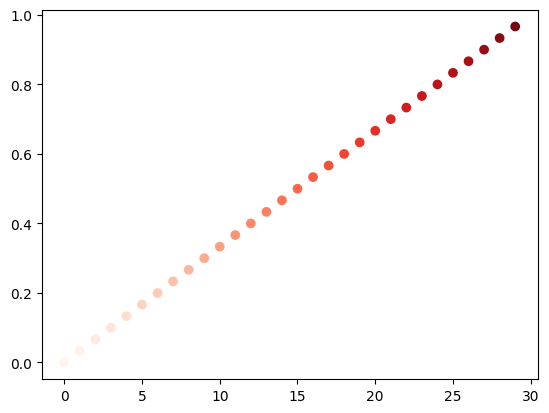

In [42]:
from networkx.drawing.nx_agraph import to_agraph
import matplotlib 
def dist(s, target):
    s_tuple = s.split('_')[-3:]
    assert len(s_tuple) == len(target)
    return sum([np.abs(int(s_tuple[i]) - target[i]) for i in range(len(s_tuple))])

def plot_graph(model_names, seen_states, states_reached_with_best_action, best_action_edge):
    for m in model_names:
        graph_file_name = "generated_" + str(m) + ".p"
        g = pickle.load( open(f"out/uppaal_models/{graph_file_name}", "rb" ) )
        print_statistics(g)

        # remove profile nodes
        start_profile_states = [s for s in g.nodes if '_'.join([str(i) for i in start_profile]) not in s and 'startprofile' in s]
        g.remove_nodes_from(start_profile_states)

        played_states = [s for s in g.nodes if "played_" in s]
        g.remove_nodes_from(played_states)

        song_states = [s for s in g.nodes if "song_" in s and s.split(': song')[0] not in seen_states]
        g.remove_nodes_from(song_states)

        seen_states_graph = [s for s in g if s.split(':')[0] in seen_states]
        assert(len(seen_states_graph) == len(seen_states))
        not_reaching = [s for s in g.nodes if not any([nx.has_path(g, s, t) for t in seen_states_graph])]
        g.remove_nodes_from(not_reaching)


        # remove not reachable from start
        not_reachable = [s for s in g if not nx.has_path(g, "start", s)]
        g.remove_nodes_from(not_reachable)

        node_groups = {i : [] for i in range(30)}
        for s in g.nodes:
            if "song_" not in s:
                continue
            if s.split(': song')[0] in states_reached_with_best_action:
                continue
            node_groups[dist(s, target_profile)].append(s)
        for k in node_groups:
            for s in node_groups[k][1:]:
                g = nx.contracted_nodes(g, node_groups[k][0], s)

        cmap = matplotlib.cm.get_cmap('Reds')# could also use turbo, or inferno
        data = [i/30 for i in list(range(0,30))]
        c = [matplotlib.colors.rgb2hex(cmap(i)) for i in data]
        plt.scatter(range(30), data, c = c)
        plt.show()

        A = to_agraph(g)
        for s in g.nodes:
            n = A.get_node(s)
            if "song_" in s or "played_" in s:
                n.attr['fillcolor'] = matplotlib.colors.rgb2hex(cmap(dist(s, target_profile)/30))
                n.attr['label'] = ""
                n.attr['style'] = "filled"
                n.attr['width'] = 2
                n.attr['height'] = 2
            id = s.split(': song')[0]
            if id in states_reached_with_best_action:
                n.attr['width'] = 4
                n.attr['height'] = 4
            if "end" not in n and "start" not in n:
                if "song_" in n and s.split(': song')[0] not in states_reached_with_best_action:
                    n.attr['label'] = len(node_groups[dist(s, target_profile)])
                    n.attr['fontsize'] = 60
                else:
                    n.attr['label'] = ""
            if "end" in n or "start" in n:
                n.attr['fontsize'] = 80
                n.attr['width'] = 2
                n.attr['height'] = 2
            if "context" in n:
                n.attr['label'] = ""
                n.attr['fillcolor'] = 'blue'
                n.attr['style'] = "filled"
                n.attr['width'] = 3
                n.attr['height'] = 3
                
        for e in g.edges:
            n = A.get_edge(e[0],e[1])
            id = e[1].split(': song')[0]
            id0 = e[0].split(': select')[0]
            n.attr['penwidth'] = 1
            if (id0, id) in best_action_edge or ("start" in e[0] and not "startprofile" in e[0]) or "startprofile" in e[0] and "q209" in e[1]:
                n.attr['color'] = '#0000ff80'
                n.attr['penwidth'] = 20
                n.attr['weight'] = 100

        A.graph_attr['size'] = "7.75,10.25"
        A.graph_attr["ratio"] = 1.1
        A.graph_attr["nodesep"] = 0.01
        A.graph_attr["ranksep"] = 0.01
        A.graph_attr["rankdir"] = 'LR'
        A.layout('dot')
        A.draw('out/reduced_plot.dot')
plot_graph(['0.9999999999999'], seen_states = [s.split('song')[0] for s in seen_states if 'song' in s], states_reached_with_best_action=[s.split('song')[0] for s in states_reached_with_best_action if 'song' in s], best_action_edge=[(s.split('select')[0], edges_with_best_action[s].split('song')[0]) for s in edges_with_best_action])

# Add Legend

Some dots were moved by hand to have a better readable plot:
dot -Tpng reduced_plot_hand.dot -o reduced_plot.png -Gdpi=1000 -Kneato -n

/tmp/ipykernel_11029/2958658534.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


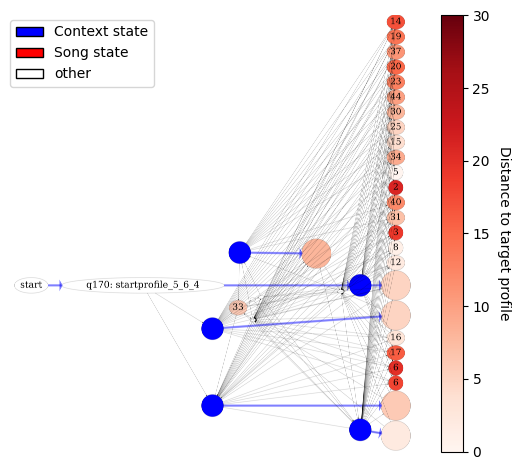

In [43]:
import matplotlib.image as mpimg
import matplotlib
img = mpimg.imread('out/reduced_plot.png')
im = plt.imshow(img)
plt.axis('off')

colors = ['blue', 'red', 'white']
label = ['Context state', 'Song state', 'other']
patches = [ mpatches.Patch(facecolor=colors[i], label=label[i], edgecolor='black' ) for i in range(len(colors)) ]
plt.legend(handles=patches, bbox_to_anchor=(-0.01, 0.99), loc=2, borderaxespad=0.)

sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.get_cmap('Reds'))
sm.set_clim(vmin=0, vmax=30)
cbar = plt.colorbar(sm)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Distance to target profile', rotation=270)

plt.tight_layout()
plt.savefig("out/reduced_plot_legend.png", dpi = 500)
plt.show()